In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense               # 차원 축소 함수
from tensorflow.keras.optimizers import Adam            # 근의 공식 함수
from keras.utils import np_utils
from keras import datasets

In [2]:
def DNN_ModelSequential(n_input, n_hidden, n_hidden2, n_out):
  model = Sequential()
  model.add(Dense(n_hidden, input_shape=(n_input,), activation='relu'))
  model.add(Dense(n_hidden2, activation='relu'))
  model.add(Dense(n_out, activation='softmax')) 

  opt = Adam(lr=0.01)
  model.compile(opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [3]:
(X_train, Y_train), (X_test, Y_test) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


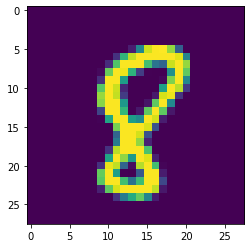

8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  21 118 237 254 255
  214  78   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  37 168 231 254 254 254 254
  254 244 115   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  32 186 254 254 254 179  98  83
  235 254 215   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   6 197 254 249 165  46 

In [11]:
mySample = np.random.randint(60000)
plt.imshow(X_train[mySample])                       # 이미지 불러오기
plt.show()
print(Y_train[mySample])                            # mySample List형식으로 만들어 각 픽셀 좌표를 알려줌
print(X_train[mySample])

In [12]:
# Data 변수 정의 및 선언
def Data_func():
  (X_train, Y_train), (X_test, Y_test) = datasets.mnist.load_data()
  Y_train = np_utils.to_categorical(Y_train)
  Y_test = np_utils.to_categorical(Y_test)
  L, W, H = X_train.shape
  X_train = X_train.reshape(-1, W * H)
  X_test = X_test.reshape(-1, W * H)
  X_train = X_train / 255
  X_test = X_test / 255
  return (X_train, Y_train), (X_test, Y_test)

In [13]:
# 학습 DEPTH 뇌구조 만들기
model = DNN_ModelSequential(784, 128, 128, 10)
(x_train, y_train), (x_test, y_test) = Data_func()
print(model.summary())
print(x_train.shape, y_train.shape)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None
(60000, 784) (60000, 10)


In [37]:
 # 학습 로직 및 학습 결과 데이터
 # epochs가 많아도 문제 : 과 학습 실제로 문제가 있는지 없는지 구별 불가.
fit_hist = model.fit(x_train, y_train, epochs=15, batch_size=128,                                    
                     validation_split=0.2)
performance_test = model.evaluate(x_test, y_test, batch_size=128)
print('test Loss Accurecy -> ',performance_test)

# Epoch : 하나의 작업 (375번 반복)

Epoch 1/15
375/375 [==============================] - 2s 4ms/step - loss: 0.0433 - accuracy: 0.9939 - val_loss: 0.5828 - val_accuracy: 0.9716
Epoch 2/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0261 - accuracy: 0.9951 - val_loss: 0.6032 - val_accuracy: 0.9717
Epoch 3/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0305 - accuracy: 0.9947 - val_loss: 0.6483 - val_accuracy: 0.9716
Epoch 4/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0232 - accuracy: 0.9957 - val_loss: 0.5496 - val_accuracy: 0.9747
Epoch 5/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0291 - accuracy: 0.9954 - val_loss: 0.6508 - val_accuracy: 0.9713
Epoch 6/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0516 - accuracy: 0.9936 - val_loss: 0.6217 - val_accuracy: 0.9693
Epoch 7/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0325 - accuracy: 0.9941 - val_loss: 0.5996 - val_accuracy: 0.9709
Epoch 

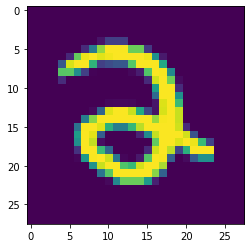

2
2


In [56]:
mySample = np.random.randint(10000)
plt.imshow(X_test[mySample])
plt.show()
print(Y_test[mySample])
pred = model.predict(x_test[mySample].reshape(-1,784))
print(np.argmax(pred))

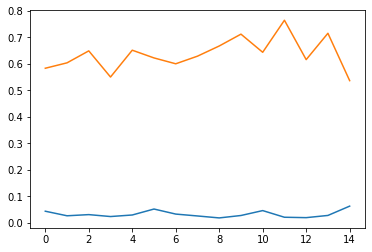

In [57]:
plt.plot(fit_hist.history['loss'])
plt.plot(fit_hist.history['val_loss'])
plt.show()

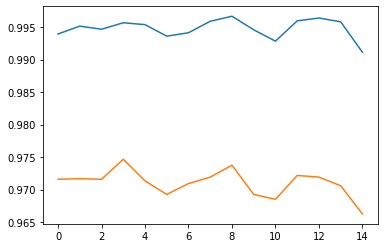

In [58]:
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()